### Question B, subquestion 2 (B2)

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle


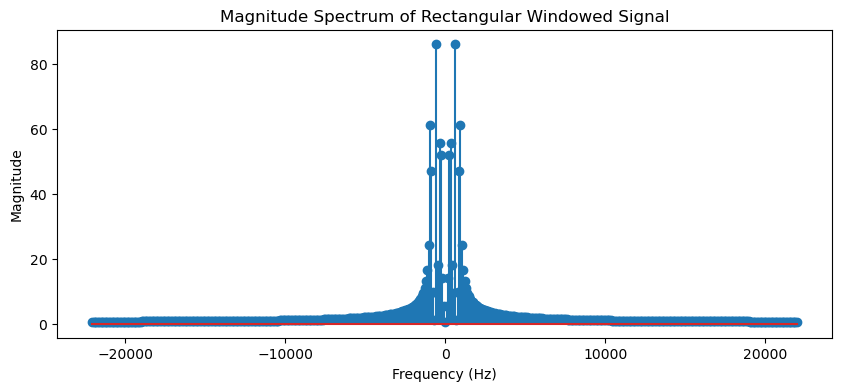


Original frequencies:
 [301.4648, 602.9296, 904.3944000000001]

Peak frequencies:
 [  344.53125     602.9296875   947.4609375 43152.5390625 43497.0703125
 43755.46875  ]


In [2]:
# In this code cell, we will retrieve the synthesized signal we defined above using Discrete Fourier Transform (DFT)
# We will compute the DFT of the synthesized signal, following steps below:

#* Subquestion B.2.a

# We load the synthesized signal and the frequencies from the saved variables
with open('variables.pickle', 'rb') as f:
    saved_variables = pickle.load(f)

# We access the variables
new_signal = saved_variables['new_signal']
fs = saved_variables['fs']
f1 = saved_variables['f1']
f2 = saved_variables['f2']
f3 = saved_variables['f3']

signal_B = new_signal # We use the synthesized signal from the previous code cell

# First, we define the DFT length (N)
N = len(signal_B) # Number of samples of the signal

# We, now, apply a rectangular window to the signal
window = np.ones(N) # Rectangular window

# We, then, multiply the signal by the window
windowed_signal = signal_B * window

# We perform the Discrete Fourier Transform (DFT) on the windowed signal
magnitude_spectrum = np.abs(np.fft.fft(windowed_signal)) # We use np.abs to get the magnitude of the DFT (to keep only the real part)

# We get the frequency axis of the DFT (we want to keep only the positive frequencies)
freq_axis = np.fft.fftfreq(N, 1 / fs) # We use the sampling frequency to get the frequency axis

# We, finally, plot the magnitude spectrum of the signal
plt.figure(figsize = (10, 4))
plt.stem(freq_axis, magnitude_spectrum) # We use a stem plot to visualize the magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Rectangular Windowed Signal')
plt.show()

#* Subquestion B.2.b
# We, now, want to generate a vector (fk) that contains the frequencies of the N frequency bins of the DFT
# We do this by using the formula fk = k * fs / N (= k * 1 / Ts = k * 1 / (N * fs)), where k is the index of the frequency bin

# So, we first define the index vector (k) of the frequency bins
k = np.arange(0, N) # Index vector

# We, now, compute the frequency vector (fk) using the formula above
fk = k * fs / N


#* Subquestion B.2.c
# We, now, want to get the peaks (DFT amplitude values) and locations (bins) of the magnitude spectrum
# We will use the find_peaks function from the scipy library to get the peaks

# We first need to flatten the magnitude spectrum
magnitude_spectrum_flat = magnitude_spectrum.flatten()

# We, then, find the peaks of the magnitude spectrum
pks, _ = find_peaks(magnitude_spectrum_flat, distance = 1) # We set the distance between peaks to 1 in order to find all peaks

# We, now, get the locations (bins) and values of the peaks
locs = pks # The location of the peaks is simply the indices of the peaks
pk_values = magnitude_spectrum_flat[locs] # Values


#* Subquestion B.2.d
# We, now, want to convert each of the peak locations (bins) to the corresponding frequency values
# and generate a vector (pk_pairs) that contains amplitude - frequency pairs of the peaks

# To convert the peak locations (bins) to frequency values, we use the formula fk = k * fs / N
# that we implemented above
peak_frequencies = fk[locs] # We get the frequency values of the peak locations

# We, then, generate the amplitude - frequency vector (list) of the peaks
# NOTE: Conventionally, we add the amplitude of the peak first, then the corresponding frequency
amplitude_frequency_pairs = []
for i in range(len(locs)):
    amplitude_frequency_pairs.append(pk_values[i])  # Amplitude of the peak
    amplitude_frequency_pairs.append(peak_frequencies[i])  # Frequency of the peak

# Alternatively, we can use a list of tuples to store the amplitude - frequency pairs
# amplitude_frequency_pairs = list(zip(pk_values, peak_frequencies))

# print("Original Amplitude - Frequency pairs:\n", amplitude_frequency_pairs)

# We, now, store variables to be used in "B3.ipynb"
saved_variables.update({
    'fk': fk,
    'locs': locs,
    'magnitude_spectrum': magnitude_spectrum,
    'magnitude_spectrum_flat': magnitude_spectrum_flat,
    'N': N,
    'amplitude_frequency_pairs': amplitude_frequency_pairs,
    'freq_axis': freq_axis
})

# Saving the updated dictionary back to the pickle file
with open('variables.pickle', 'wb') as f:
    pickle.dump(saved_variables, f)
    

#* Subquestion B.2.e
# Commenting on the accuracy of the results of the peak frequencies and their amplitudes (based on the magnitude spectrum)

# We see that the peak frequencies and their amplitudes are not exactly the same as the original frequencies and amplitudes of the synthesized signal
# We can compare the peak frequencies with the original frequencies, simply by printing them out

print("\nOriginal frequencies:\n", [f1, f2, f3])
print("\nPeak frequencies:\n", peak_frequencies)


# This is due to the fact that the DFT is not able to perfectly represent the synthesized signal in the frequency domain, since we use a rectangular window of the size of the signal
# This means that DFT is averaged over the window size, which causes the peaks to be spread out and not exactly at the original frequencies
# This is known as spectral leakage, which is a common issue in DFT analysis
# It can be solved by using a window function that tapers the signal at the edges, such as the Hamming window, which reduces the leakage effect
# In this case, we used a rectangular window, which is the simplest window function and has the worst leakage effect
# Therefore, the peak frequencies are not exactly the same as the original frequencies of the synthesized signal
